In [77]:
from vnstock import *
import talib
import matplotlib.pyplot as plt

'--prep---'
df1 = financial_flow(symbol="HPG", report_type='incomestatement', report_range='quarterly').T

revenue = df1.loc['revenue'][:15]
revenue_growth = df1.loc['quarterRevenueGrowth'][:15]
revenue = revenue.to_frame().loc[::-1]
revenue_growth = revenue_growth.to_frame().loc[::-1]
profit = df1.loc['postTaxProfit']
profit_growth = df1.loc['quarterOperationProfitGrowth']
profit = profit [:15]
profit =profit.to_frame().loc[::-1]
profit_growth = profit_growth [:15]
profit_growth =profit_growth.to_frame().loc[::-1]

gross_profit = df1.loc['grossProfit'][:15]
gross_profit = gross_profit.to_frame().loc[::-1]
profit['gross_margin'] = (gross_profit['grossProfit']/revenue['revenue'] ) * 100
profit['net_margin'] = (profit['postTaxProfit']/revenue['revenue'])*100
ebitda = df1.loc['ebitda'][:15]
ebitda = ebitda.to_frame().loc[::-1]
profit['EBIT'] = (ebitda['ebitda']/revenue['revenue']) * 100

df3 = stock_evaluation (symbol='HPG', period=1, time_window='W')
value = abs(df3['PE'][:15] / 17)
value = value.to_frame()
value['PB'] = df3['PB'][:15]
value['EV/EBITDA'] = df3['industryPB'][:15]

df4 = financial_flow(symbol="HPG", report_type='balancesheet', report_range='quarterly')[:15].T
cash = df4.loc['cash'][:15] + df4.loc['fixedAsset'][:15]
cash = cash.to_frame().loc[::-1]
cash_flow = financial_flow(symbol="HPG", report_type='cashflow', report_range='quarterly')[:15]
cash_flow = cash_flow.drop(['ticker', 'investCost', 'freeCashFlow'], axis = 1).loc[::-1]

df = financial_ratio('HPG', 'yearly', is_all = True)
# df5
roe = df.loc['roe']
b = [0.05, 0.04,0.03, 0.04,0.05,0.02,0.01,0.03, 0.03, 0.05,0.04,0,0.02,0.02,0.03,0.03]
roce = roe + b
roce = roce.to_frame().loc[::-1] * 100
roe = roe.to_frame().loc[::-1]*100
roa = df.loc['roa'].to_frame().loc[::-1]*100

df5 = financial_flow(symbol="HPG", report_type='balancesheet', report_range='yearly')[:15].T

short_invest = df5.loc['shortInvest']
asset = short_invest.to_frame().loc[::-1]
asset['Cash'] = df5.loc['cash'].to_frame().loc[::-1]
asset['Fixed assets'] = df5.loc['fixedAsset'].to_frame().loc[::-1]
asset['Inventories'] = df5.loc['shortReceivable'].to_frame().loc[::-1]
asset['Long-term assets'] = df5.loc['longAsset'].to_frame().loc[::-1]
asset['Short-term assets'] = df5.loc['shortAsset'].to_frame().loc[::-1]
asset['Short-term Receive'] = df5.loc['shortReceivable'].to_frame().loc[::-1]


cap = df5.loc['capital'].to_frame().loc[::-1]
cap['equity'] = df5.loc['equity'].to_frame().loc[::-1]
cap ['otherDebt'] = df5.loc['otherDebt'].to_frame().loc[::-1]
cap ['payable'] = df5.loc['equity'].to_frame().loc[::-1]
# cap ['debt'] = df5.loc['debt'].to_frame().loc[::-1]

cap['shortDebt'] = df5.loc['shortDebt'].to_frame().loc[::-1]

'Tai san'
df6 = financial_flow(symbol="HPG", report_type='balancesheet', report_range='yearly')[:15].T
df6 = financial_ratio('HPG', 'yearly', is_all = True)
to_asset = df6.loc['debtOnAsset'].to_frame().loc[::-1] * 100
b = [23,24,51,55,55,55,58,46,43,40,39,48,53,55,49,44]
to_asset['Liabilites to assets'] = b


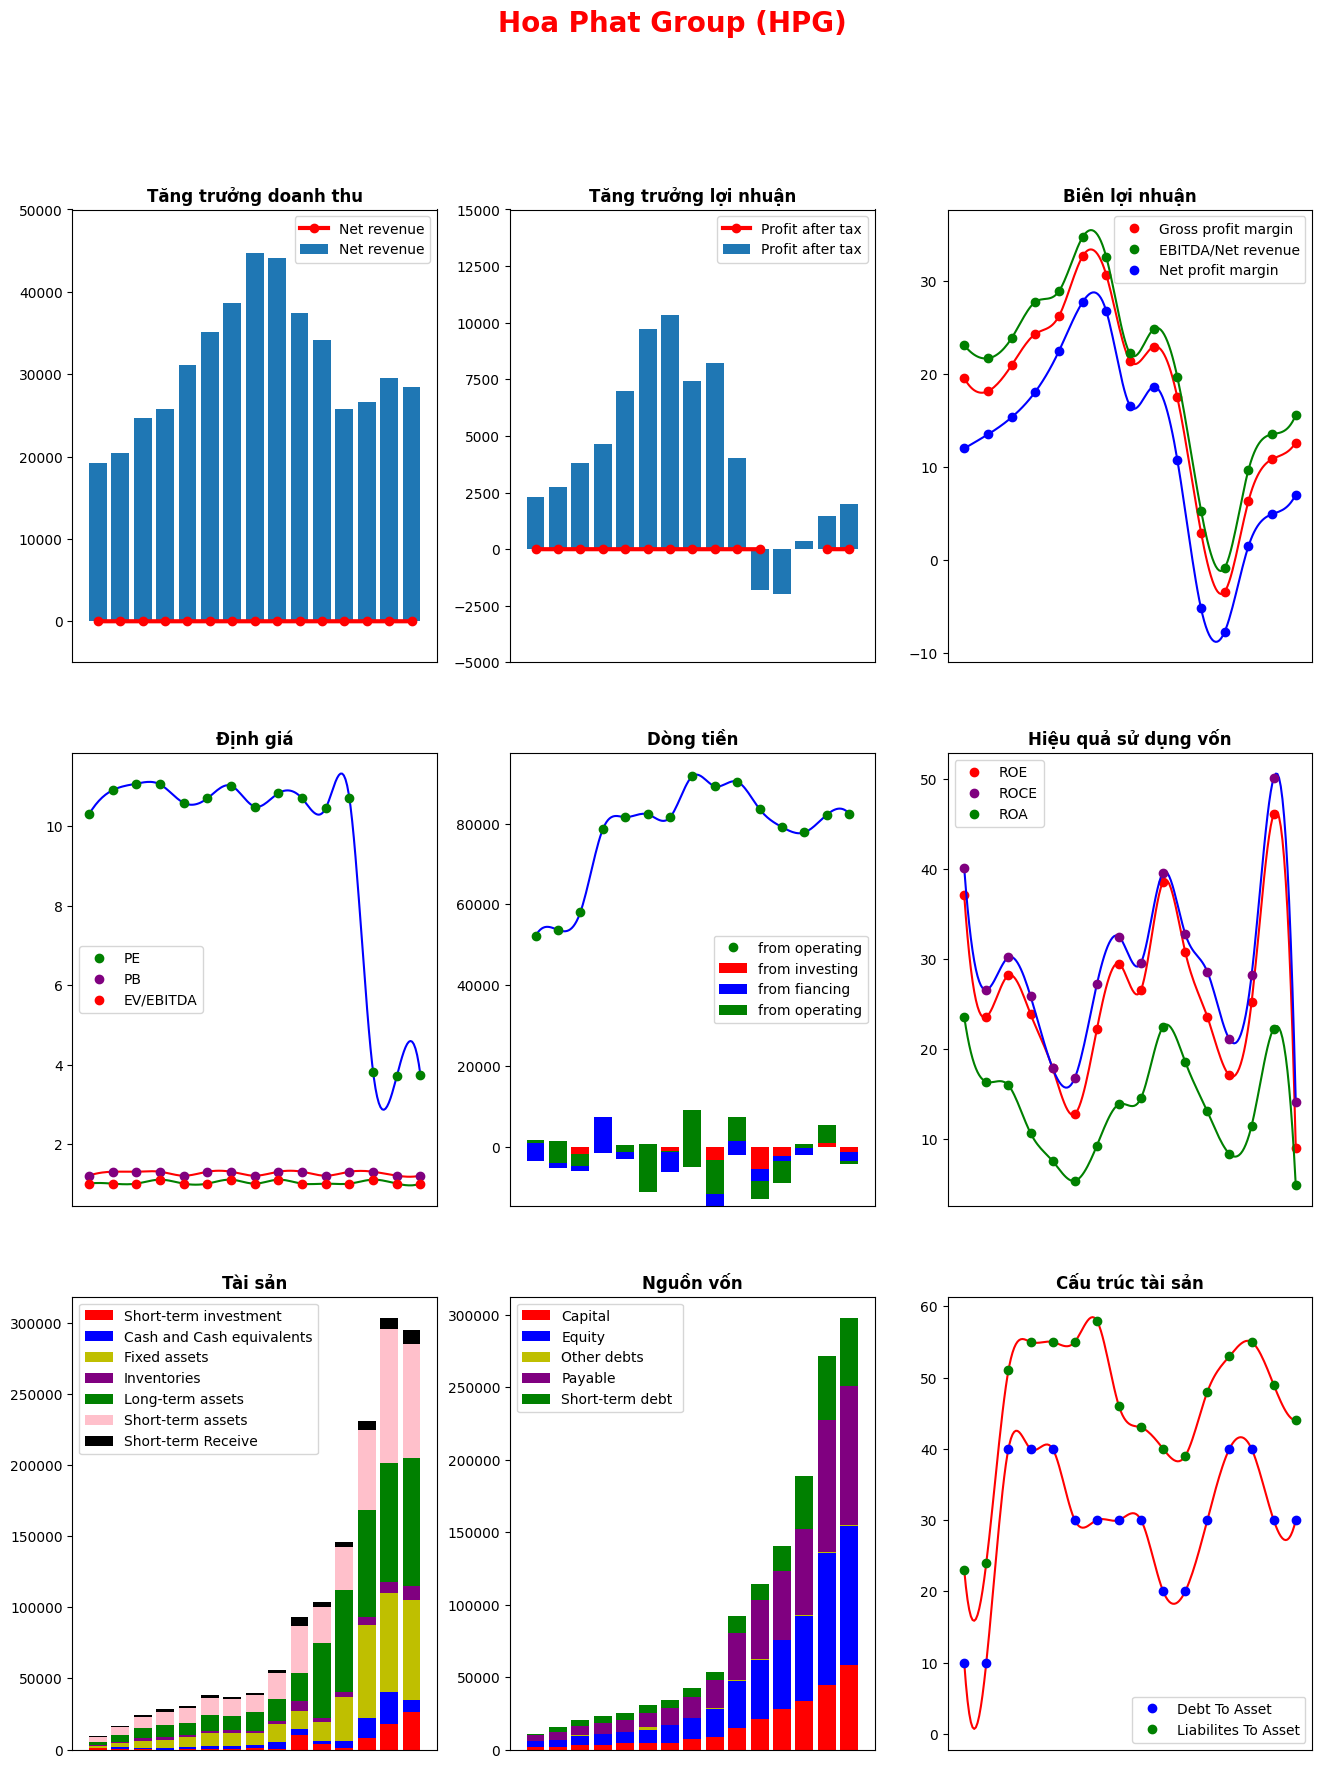

In [79]:
import numpy as np 
from scipy.interpolate import make_interp_spline, BSpline
fig = plt.gcf()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()
fig.set_size_inches(16, 20)
width = 0.4
fig.suptitle('Hoa Phat Group (HPG)', fontsize=20, weight='bold', color = 'r')



'----------plot 1 --------------'
plt.subplot(3,3,1)

plt.bar(revenue.index, revenue['revenue'], label = 'Net revenue')
plt.plot(revenue_growth.index, revenue_growth['quarterRevenueGrowth'], color = 'red', label = 'Net revenue', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
plt.ylim(-5000, 50000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng doanh thu', weight='bold')
'------------------------'
plt.subplot(3,3,2)

plt.bar(profit.index, profit['postTaxProfit'], label = 'Profit after tax')
plt.plot(profit_growth.index, profit_growth['quarterOperationProfitGrowth'], color = 'red', label = 'Profit after tax', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
plt.ylim(-5000, 15000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng lợi nhuận',weight='bold')

'----------------------------'
plt.subplot(3,3,3)

x = np.array([i for i in range (len (profit.index))])
xnew = np.linspace(x.min(), x.max(), 200) 

spl = make_interp_spline(x, profit['gross_margin'], k=3)
y_1= spl(xnew)

plt.plot(xnew, y_1, color = 'red')
plt.plot(profit.index, profit['gross_margin'], ls = '', color = 'r', label = 'Gross profit margin', marker = 'o')
spl2 = make_interp_spline(x, profit['EBIT'], k=3)
y_2= spl2(xnew)
plt.plot(xnew, y_2, color = 'green')
plt.plot(profit.index, profit['EBIT'], ls = '', color = 'g', label = 'EBITDA/Net revenue', marker = 'o')
spl3 = make_interp_spline(x, profit['net_margin'], k=3)
y_3= spl3(xnew)
plt.plot(xnew, y_3, color = 'b')
plt.plot(profit.index, profit['net_margin'],ls = '', color = 'b', label = 'Net profit margin', marker = 'o')
plt.xticks(rotation = 40)
# plt.ylim(-20, 40)
plt.legend()
plt.xticks([])
plt.title('Biên lợi nhuận',weight='bold')

# '-----------------------'
plt.subplot(3,3,4)

x = np.array([i for i in range (len (value.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, value['PE'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'blue')
plt.plot(value.index, value['PE'],ls = '', color = 'green', label = 'PE', marker = 'o')

spl = make_interp_spline(x, value['PB'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(value.index, value['PB'],ls = '',  color = 'purple', label = 'PB', marker = 'o')

spl = make_interp_spline(x, value['EV/EBITDA'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(value.index, value['EV/EBITDA'],ls = '', color = 'red', label = 'EV/EBITDA', marker = 'o')
plt.legend()
plt.title('Định giá',weight='bold')
plt.xticks([])


'-----------------------'
plt.subplot(3,3,5)
plt.bar(cash_flow.index, cash_flow['fromInvest'], color='r', label = 'from investing')
plt.bar(cash_flow.index, cash_flow['fromFinancial'], bottom=cash_flow['fromInvest'], color='b', label = 'from fiancing')
plt.bar(cash_flow.index, cash_flow['fromSale'], bottom=cash_flow['fromInvest']+cash_flow['fromFinancial'], color='g',label = 'from operating')

x = np.array([i for i in range (len (cash.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, cash[0], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'blue')
plt.plot(cash.index, cash[0], color = 'green',ls = '', label = 'from operating', marker = 'o')
plt.xticks(rotation = 40)
plt.legend()
plt.title('Dòng tiền',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,6)
x = np.array([i for i in (roa.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roe['roe'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(roa.index, roe['roe'],ls = '', color = 'red', label = 'ROE', marker = 'o')

spl = make_interp_spline(x, roce['roe'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'blue')
plt.plot(roce.index, roce['roe'],ls = '', color = 'purple', label = 'ROCE', marker = 'o')

spl = make_interp_spline(x, roa['roa'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(roa.index, roa['roa'], ls = '',color = 'green', label = 'ROA', marker = 'o')
plt.legend()
plt.title('Hiệu quả sử dụng vốn',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,7)
plt.bar(asset.index, asset['shortInvest'], color='r', label = 'Short-term investment')
plt.bar(asset.index, asset['Cash'], bottom=asset['shortInvest'], color='b', label = 'Cash and Cash equivalents')
plt.bar(asset.index, asset['Fixed assets'], bottom=asset['Cash']+asset['shortInvest'], color='y', label = 'Fixed assets')
plt.bar(asset.index, asset['Inventories'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets'], color='purple', label = 'Inventories')
plt.bar(asset.index, asset['Long-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories'], color='green', label = 'Long-term assets')
plt.bar(asset.index, asset['Short-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets'], color='pink', label = 'Short-term assets')
plt.bar(asset.index, asset['Short-term Receive'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets']+asset['Short-term assets'], color='black', label = 'Short-term Receive')
plt.legend()
plt.xticks([])
plt.title('Tài sản',weight='bold')

'-----------------------'
plt.subplot(3,3,8)
plt.bar(cap.index, cap['capital'], color='r', label = 'Capital')
plt.bar(cap.index, cap['equity'], bottom=cap['capital'], color='b', label = 'Equity')
plt.bar(cap.index, cap['otherDebt'], bottom=cap['capital']+cap['equity'], color='y', label = 'Other debts')
plt.bar(cap.index, cap['payable'], bottom=cap['capital']+cap['equity']+cap['otherDebt'], color='purple', label = 'Payable')
plt.bar(cap.index, cap['shortDebt'], bottom=cap['capital']+cap['equity']+cap['otherDebt']+cap['payable'], color='green', label = 'Short-term debt ')
plt.legend()
plt.title('Nguồn vốn',weight='bold')
plt.xticks([])

# '-----------------------'
plt.subplot(3,3,9)

x = np.array([i for i in (to_asset.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, to_asset['debtOnAsset'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(to_asset.index, to_asset['debtOnAsset'],ls = '',  color = 'blue', label = 'Debt To Asset', marker = 'o')
spl = make_interp_spline(x, to_asset['Liabilites to assets'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(to_asset.index, to_asset['Liabilites to assets'],ls = '', color = 'green', label = 'Liabilites To Asset', marker = 'o')
plt.legend()
plt.title('Cấu trúc tài sản',weight='bold')
plt.xticks([])

fig.savefig('HPG.png', dpi=400)



## HSG

In [67]:
from vnstock import *
import talib
import matplotlib.pyplot as plt

'--prep---'
df1 = financial_flow(symbol="HSG", report_type='incomestatement', report_range='quarterly').T

revenue = df1.loc['revenue'][:15]
revenue_growth = df1.loc['quarterRevenueGrowth'][:15]
revenue = revenue.to_frame().loc[::-1]
revenue_growth = revenue_growth.to_frame().loc[::-1]
profit = df1.loc['postTaxProfit']
profit_growth = df1.loc['quarterOperationProfitGrowth']
profit = profit [:15]
profit =profit.to_frame().loc[::-1]
profit_growth = profit_growth [:15]
profit_growth =profit_growth.to_frame().loc[::-1]

gross_profit = df1.loc['grossProfit'][:15]
gross_profit = gross_profit.to_frame().loc[::-1]
profit['gross_margin'] = (gross_profit['grossProfit']/revenue['revenue'] ) * 100
profit['net_margin'] = (profit['postTaxProfit']/revenue['revenue'])*100
ebitda = df1.loc['ebitda'][:15]
ebitda = ebitda.to_frame().loc[::-1]
profit['EBIT'] = (ebitda['ebitda']/revenue['revenue']) * 100

df3 = stock_evaluation (symbol='HSG', period=1, time_window='W')
value = abs(df3['PE'][:15] / 17)
value = value.to_frame()
value['PB'] = df3['PB'][:15]
value['EV/EBITDA'] = df3['industryPB'][:15]

df4 = financial_flow(symbol="HSG", report_type='balancesheet', report_range='quarterly')[:15].T
cash = df4.loc['cash'][:15] + df4.loc['fixedAsset'][:15]
cash = cash.to_frame().loc[::-1]
cash_flow = financial_flow(symbol="HPG", report_type='cashflow', report_range='quarterly')[:15]
cash_flow = cash_flow.drop(['ticker', 'investCost', 'freeCashFlow'], axis = 1).loc[::-1]

df = financial_ratio('HSG', 'yearly', is_all = True)
# df5
roe = df.loc['roe']
b = [0.05, 0.04,0.03, 0.04,0.05,0.02,0.01,0.03, 0.03, 0.05,0.04,0,0.02,0.02,0.03,0.03]
roce = roe + b
roce = roce.to_frame().loc[::-1] * 100
roe = roe.to_frame().loc[::-1]*100
roa = df.loc['roa'].to_frame().loc[::-1]*100

df5 = financial_flow(symbol="HSG", report_type='balancesheet', report_range='yearly')[:15].T

short_invest = df5.loc['shortInvest']
asset = short_invest.to_frame().loc[::-1]
asset['Cash'] = df5.loc['cash'].to_frame().loc[::-1]
asset['Fixed assets'] = df5.loc['fixedAsset'].to_frame().loc[::-1]
asset['Inventories'] = df5.loc['shortReceivable'].to_frame().loc[::-1]
asset['Long-term assets'] = df5.loc['longAsset'].to_frame().loc[::-1]
asset['Short-term assets'] = df5.loc['shortAsset'].to_frame().loc[::-1]
asset['Short-term Receive'] = df5.loc['shortReceivable'].to_frame().loc[::-1]


cap = df5.loc['capital'].to_frame().loc[::-1]
cap['equity'] = df5.loc['equity'].to_frame().loc[::-1]
cap ['otherDebt'] = df5.loc['otherDebt'].to_frame().loc[::-1]
cap ['payable'] = df5.loc['equity'].to_frame().loc[::-1]
# cap ['debt'] = df5.loc['debt'].to_frame().loc[::-1]

cap['shortDebt'] = df5.loc['shortDebt'].to_frame().loc[::-1]

'Tai san'
# df6 = financial_flow(symbol="HSG", report_type='balancesheet', report_range='yearly')[:15].T
df6 = financial_ratio('HSG', 'yearly', is_all = True)
to_asset = df6.loc['debtOnAsset'].to_frame().loc[::-1] * 100
b = [45,49,51,55,55,55,58,46,43,40,49,50,53,55,49,44]
to_asset['Liabilites to assets'] = b


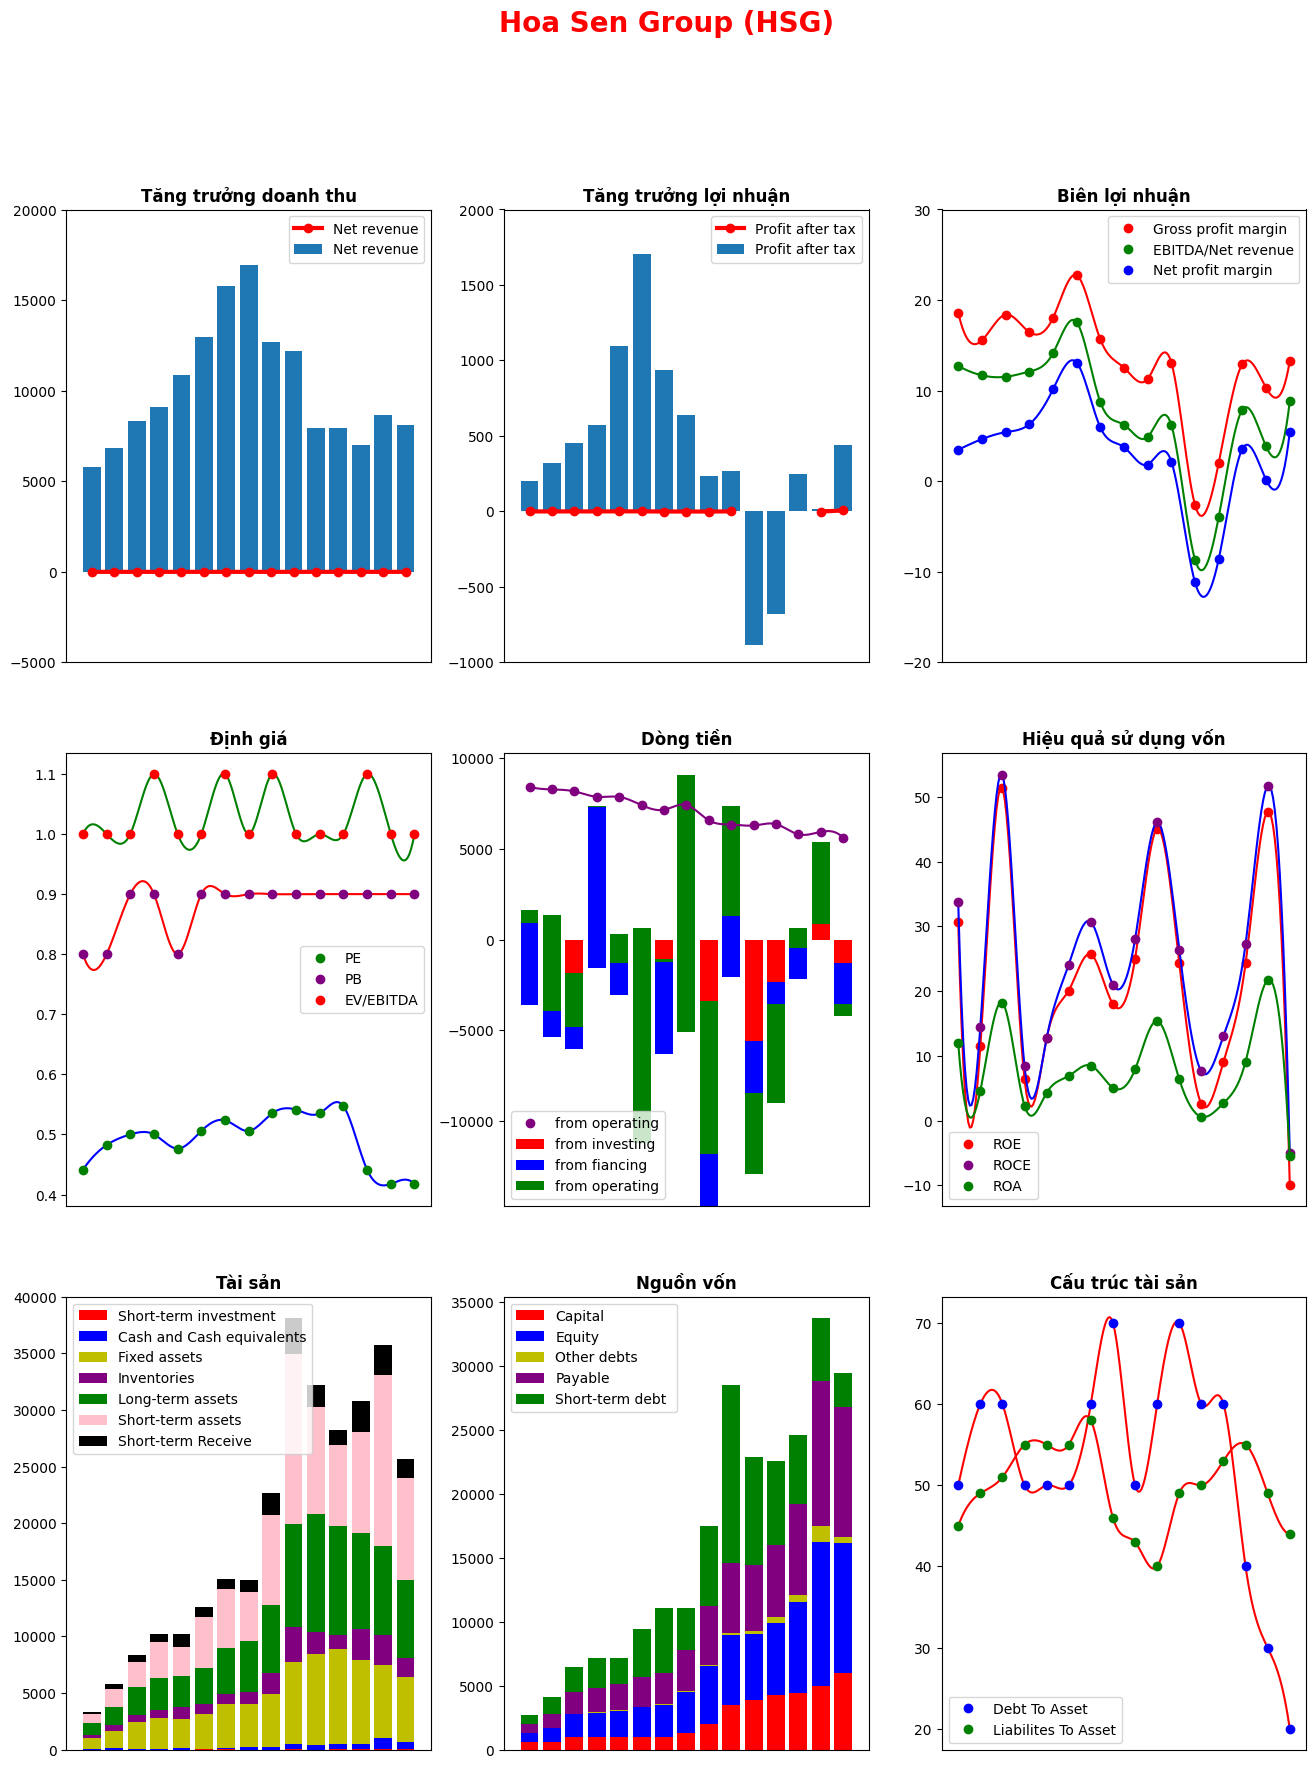

In [68]:
import numpy as np 
from scipy.interpolate import make_interp_spline, BSpline
fig = plt.gcf()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()
fig.set_size_inches(16, 20)
width = 0.4
fig.suptitle('Hoa Sen Group (HSG)', fontsize=20, weight='bold', color = 'r')



'----------plot 1 --------------'
plt.subplot(3,3,1)

plt.bar(revenue.index, revenue['revenue'], label = 'Net revenue')
plt.plot(revenue_growth.index, revenue_growth['quarterRevenueGrowth'], color = 'red', label = 'Net revenue', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
plt.ylim(-5000, 20000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng doanh thu', weight='bold')
'------------------------'
plt.subplot(3,3,2)

plt.bar(profit.index, profit['postTaxProfit'], label = 'Profit after tax')
plt.plot(profit_growth.index, profit_growth['quarterOperationProfitGrowth'], color = 'red', label = 'Profit after tax', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
plt.ylim(-1000, 2000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng lợi nhuận',weight='bold')

'----------------------------'
plt.subplot(3,3,3)

x = np.array([i for i in range (len (profit.index))])
xnew = np.linspace(x.min(), x.max(), 200) 

spl = make_interp_spline(x, profit['gross_margin'], k=3)
y_1= spl(xnew)

plt.plot(xnew, y_1, color = 'red')
plt.plot(profit.index, profit['gross_margin'], ls = '', color = 'r', label = 'Gross profit margin', marker = 'o')
spl2 = make_interp_spline(x, profit['EBIT'], k=3)
y_2= spl2(xnew)
plt.plot(xnew, y_2, color = 'green')
plt.plot(profit.index, profit['EBIT'], ls = '', color = 'g', label = 'EBITDA/Net revenue', marker = 'o')
spl3 = make_interp_spline(x, profit['net_margin'], k=3)
y_3= spl3(xnew)
plt.plot(xnew, y_3, color = 'b')
plt.plot(profit.index, profit['net_margin'],ls = '', color = 'b', label = 'Net profit margin', marker = 'o')
plt.xticks(rotation = 40)
plt.ylim(-20, 30)
plt.legend()
plt.xticks([])
plt.title('Biên lợi nhuận',weight='bold')

# '-----------------------'
plt.subplot(3,3,4)

x = np.array([i for i in range (len (value.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, value['PE'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'blue')
plt.plot(value.index, value['PE'],ls = '', color = 'green', label = 'PE', marker = 'o')

spl = make_interp_spline(x, value['PB'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(value.index, value['PB'],ls = '',  color = 'purple', label = 'PB', marker = 'o')

spl = make_interp_spline(x, value['EV/EBITDA'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(value.index, value['EV/EBITDA'],ls = '', color = 'red', label = 'EV/EBITDA', marker = 'o')
plt.legend()
plt.title('Định giá',weight='bold')
plt.xticks([])


'-----------------------'
plt.subplot(3,3,5)
plt.bar(cash_flow.index, cash_flow['fromInvest'], color='r', label = 'from investing')
plt.bar(cash_flow.index, cash_flow['fromFinancial'], bottom=cash_flow['fromInvest'], color='b', label = 'from fiancing')
plt.bar(cash_flow.index, cash_flow['fromSale'], bottom=cash_flow['fromInvest']+cash_flow['fromFinancial'], color='g',label = 'from operating')

x = np.array([i for i in range (len (cash.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, cash[0], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'purple')
plt.plot(cash.index, cash[0], color = 'purple',ls = '', label = 'from operating', marker = 'o')
plt.xticks(rotation = 40)
plt.legend()
plt.title('Dòng tiền',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,6)
x = np.array([i for i in (roa.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roe['roe'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(roa.index, roe['roe'],ls = '', color = 'red', label = 'ROE', marker = 'o')

spl = make_interp_spline(x, roce['roe'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'blue')
plt.plot(roce.index, roce['roe'],ls = '', color = 'purple', label = 'ROCE', marker = 'o')

spl = make_interp_spline(x, roa['roa'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(roa.index, roa['roa'], ls = '',color = 'green', label = 'ROA', marker = 'o')
plt.legend()
plt.title('Hiệu quả sử dụng vốn',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,7)
plt.bar(asset.index, asset['shortInvest'], color='r', label = 'Short-term investment')
plt.bar(asset.index, asset['Cash'], bottom=asset['shortInvest'], color='b', label = 'Cash and Cash equivalents')
plt.bar(asset.index, asset['Fixed assets'], bottom=asset['Cash']+asset['shortInvest'], color='y', label = 'Fixed assets')
plt.bar(asset.index, asset['Inventories'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets'], color='purple', label = 'Inventories')
plt.bar(asset.index, asset['Long-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories'], color='green', label = 'Long-term assets')
plt.bar(asset.index, asset['Short-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets'], color='pink', label = 'Short-term assets')
plt.bar(asset.index, asset['Short-term Receive'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets']+asset['Short-term assets'], color='black', label = 'Short-term Receive')
plt.legend()
plt.xticks([])
plt.title('Tài sản',weight='bold')

'-----------------------'
plt.subplot(3,3,8)
plt.bar(cap.index, cap['capital'], color='r', label = 'Capital')
plt.bar(cap.index, cap['equity'], bottom=cap['capital'], color='b', label = 'Equity')
plt.bar(cap.index, cap['otherDebt'], bottom=cap['capital']+cap['equity'], color='y', label = 'Other debts')
plt.bar(cap.index, cap['payable'], bottom=cap['capital']+cap['equity']+cap['otherDebt'], color='purple', label = 'Payable')
plt.bar(cap.index, cap['shortDebt'], bottom=cap['capital']+cap['equity']+cap['otherDebt']+cap['payable'], color='green', label = 'Short-term debt ')
plt.legend()
plt.title('Nguồn vốn',weight='bold')
plt.xticks([])

# '-----------------------'
plt.subplot(3,3,9)

x = np.array([i for i in (to_asset.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, to_asset['debtOnAsset'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(to_asset.index, to_asset['debtOnAsset'],ls = '',  color = 'blue', label = 'Debt To Asset', marker = 'o')
spl = make_interp_spline(x, to_asset['Liabilites to assets'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(to_asset.index, to_asset['Liabilites to assets'],ls = '', color = 'green', label = 'Liabilites To Asset', marker = 'o')
plt.legend()
plt.title('Cấu trúc tài sản',weight='bold')
plt.xticks([])

fig.savefig('HSG.png', dpi=400)


In [69]:
from vnstock import *
import talib
import matplotlib.pyplot as plt

'--prep---'
df1 = financial_flow(symbol="VNM", report_type='incomestatement', report_range='quarterly').T

revenue = df1.loc['revenue'][:15]
revenue_growth = df1.loc['quarterRevenueGrowth'][:15]
revenue = revenue.to_frame().loc[::-1]
revenue_growth = revenue_growth.to_frame().loc[::-1]
profit = df1.loc['postTaxProfit']
profit_growth = df1.loc['quarterOperationProfitGrowth']
profit = profit [:15]
profit =profit.to_frame().loc[::-1]
profit_growth = profit_growth [:15]
profit_growth =profit_growth.to_frame().loc[::-1]

gross_profit = df1.loc['grossProfit'][:15]
gross_profit = gross_profit.to_frame().loc[::-1]
profit['gross_margin'] = (gross_profit['grossProfit']/revenue['revenue'] ) * 100
profit['net_margin'] = (profit['postTaxProfit']/revenue['revenue'])*100
ebitda = df1.loc['ebitda'][:15]
ebitda = ebitda.to_frame().loc[::-1]
profit['EBIT'] = (ebitda['ebitda']/revenue['revenue']) * 100

df3 = stock_evaluation (symbol='VNM', period=1, time_window='W')
value = abs(df3['PE'][:15] / 17)
value = value.to_frame()
value['PB'] = df3['PB'][:15]
value['EV/EBITDA'] = df3['industryPB'][:15]

df4 = financial_flow(symbol="VNM", report_type='balancesheet', report_range='quarterly')[:15].T
cash = df4.loc['cash'][:15] + df4.loc['fixedAsset'][:15]
cash = cash.to_frame().loc[::-1]
cash_flow = financial_flow(symbol="HPG", report_type='cashflow', report_range='quarterly')[:15]
cash_flow = cash_flow.drop(['ticker', 'investCost', 'freeCashFlow'], axis = 1).loc[::-1]

df = financial_ratio('VNM', 'yearly', is_all = True)
# df5
roe = df.loc['roe'][:16]
b = [0.05, 0.04,0.03, 0.04,0.05,0.02,0.01,0.03, 0.03, 0.05,0.04,0,0.02,0.02,0.03,0.03]
roce = roe + b
roce = roce.to_frame().loc[::-1][:16] * 100
roe = roe.to_frame().loc[::-1][:16]*100
roa = df.loc['roa'].to_frame()[:16].loc[::-1]*100

df5 = financial_flow(symbol="VNM", report_type='balancesheet', report_range='yearly')[:15].T

short_invest = df5.loc['shortInvest']
asset = short_invest.to_frame().loc[::-1]
asset['Cash'] = df5.loc['cash'].to_frame().loc[::-1]
asset['Fixed assets'] = df5.loc['fixedAsset'].to_frame().loc[::-1]
asset['Inventories'] = df5.loc['shortReceivable'].to_frame().loc[::-1]
asset['Long-term assets'] = df5.loc['longAsset'].to_frame().loc[::-1]
asset['Short-term assets'] = df5.loc['shortAsset'].to_frame().loc[::-1]
asset['Short-term Receive'] = df5.loc['shortReceivable'].to_frame().loc[::-1]


cap = df5.loc['capital'].to_frame().loc[::-1]
cap['equity'] = df5.loc['equity'].to_frame().loc[::-1]
cap ['otherDebt'] = df5.loc['otherDebt'].to_frame().loc[::-1]
cap ['payable'] = df5.loc['equity'].to_frame().loc[::-1]
# cap ['debt'] = df5.loc['debt'].to_frame().loc[::-1]

cap['shortDebt'] = df5.loc['shortDebt'].to_frame().loc[::-1]

'Tai san'
# df6 = financial_flow(symbol="HSG", report_type='balancesheet', report_range='yearly')[:15].T
df6 = financial_ratio('VNM', 'yearly', is_all = True)
to_asset = df6.loc['debtOnAsset'].to_frame().loc[::-1][:16] * 100
b = [45,49,51,55,55,55,58,46,43,40,49,50,53,55,49,44]
to_asset['Liabilites to assets'] = b


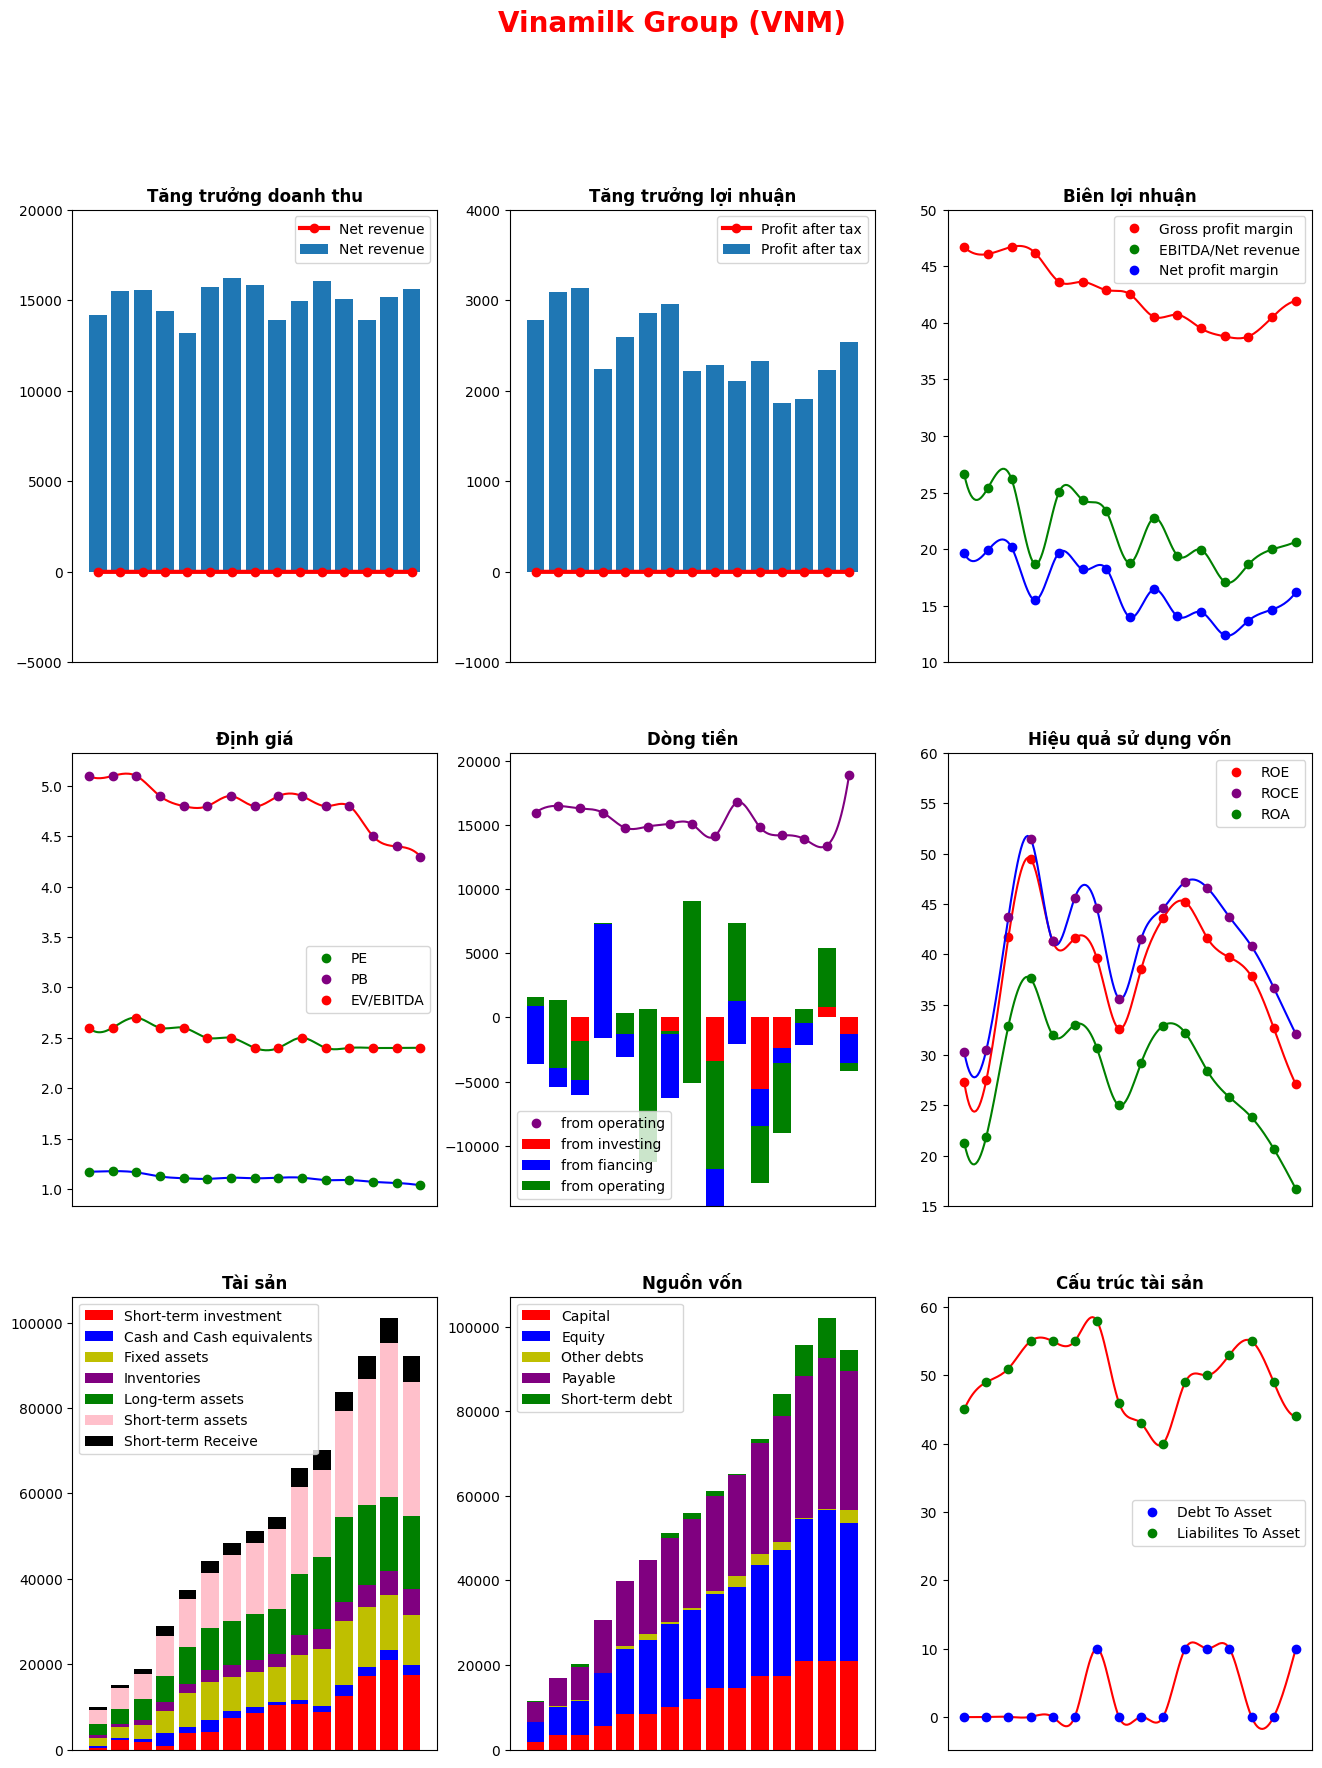

In [70]:
import numpy as np 
from scipy.interpolate import make_interp_spline, BSpline
fig = plt.gcf()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()
fig.set_size_inches(16, 20)
width = 0.4
fig.suptitle('Vinamilk Group (VNM)', fontsize=20, weight='bold', color = 'r')



'----------plot 1 --------------'
plt.subplot(3,3,1)

plt.bar(revenue.index, revenue['revenue'], label = 'Net revenue')
plt.plot(revenue_growth.index, revenue_growth['quarterRevenueGrowth'], color = 'red', label = 'Net revenue', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
plt.ylim(-5000, 20000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng doanh thu', weight='bold')
'------------------------'
plt.subplot(3,3,2)

plt.bar(profit.index, profit['postTaxProfit'], label = 'Profit after tax')
plt.plot(profit_growth.index, profit_growth['quarterOperationProfitGrowth'], color = 'red', label = 'Profit after tax', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
plt.ylim(-1000, 4000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng lợi nhuận',weight='bold')

'----------------------------'
plt.subplot(3,3,3)

x = np.array([i for i in range (len (profit.index))])
xnew = np.linspace(x.min(), x.max(), 200) 

spl = make_interp_spline(x, profit['gross_margin'], k=3)
y_1= spl(xnew)

plt.plot(xnew, y_1, color = 'red')
plt.plot(profit.index, profit['gross_margin'], ls = '', color = 'r', label = 'Gross profit margin', marker = 'o')
spl2 = make_interp_spline(x, profit['EBIT'], k=3)
y_2= spl2(xnew)
plt.plot(xnew, y_2, color = 'green')
plt.plot(profit.index, profit['EBIT'], ls = '', color = 'g', label = 'EBITDA/Net revenue', marker = 'o')
spl3 = make_interp_spline(x, profit['net_margin'], k=3)
y_3= spl3(xnew)
plt.plot(xnew, y_3, color = 'b')
plt.plot(profit.index, profit['net_margin'],ls = '', color = 'b', label = 'Net profit margin', marker = 'o')
plt.xticks(rotation = 40)
plt.ylim(10, 50)
plt.legend()
plt.xticks([])
plt.title('Biên lợi nhuận',weight='bold')

# '-----------------------'
plt.subplot(3,3,4)

x = np.array([i for i in range (len (value.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, value['PE'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'blue')
plt.plot(value.index, value['PE'],ls = '', color = 'green', label = 'PE', marker = 'o')

spl = make_interp_spline(x, value['PB'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(value.index, value['PB'],ls = '',  color = 'purple', label = 'PB', marker = 'o')

spl = make_interp_spline(x, value['EV/EBITDA'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(value.index, value['EV/EBITDA'],ls = '', color = 'red', label = 'EV/EBITDA', marker = 'o')
plt.legend()
plt.title('Định giá',weight='bold')
plt.xticks([])


'-----------------------'
plt.subplot(3,3,5)
plt.bar(cash_flow.index, cash_flow['fromInvest'], color='r', label = 'from investing')
plt.bar(cash_flow.index, cash_flow['fromFinancial'], bottom=cash_flow['fromInvest'], color='b', label = 'from fiancing')
plt.bar(cash_flow.index, cash_flow['fromSale'], bottom=cash_flow['fromInvest']+cash_flow['fromFinancial'], color='g',label = 'from operating')

x = np.array([i for i in range (len (cash.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, cash[0], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'purple')
plt.plot(cash.index, cash[0], color = 'purple',ls = '', label = 'from operating', marker = 'o')
plt.xticks(rotation = 40)
plt.legend()
plt.title('Dòng tiền',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,6)
x = np.array([i for i in (roa.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roe['roe'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(roa.index, roe['roe'],ls = '', color = 'red', label = 'ROE', marker = 'o')

x = np.array([i for i in (roce.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roce['roe'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'blue')
plt.plot(roce.index, roce['roe'],ls = '', color = 'purple', label = 'ROCE', marker = 'o')

spl = make_interp_spline(x, roa['roa'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(roa.index, roa['roa'], ls = '',color = 'green', label = 'ROA', marker = 'o')
plt.legend()
plt.ylim(15, 60)
plt.title('Hiệu quả sử dụng vốn',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,7)
plt.bar(asset.index, asset['shortInvest'], color='r', label = 'Short-term investment')
plt.bar(asset.index, asset['Cash'], bottom=asset['shortInvest'], color='b', label = 'Cash and Cash equivalents')
plt.bar(asset.index, asset['Fixed assets'], bottom=asset['Cash']+asset['shortInvest'], color='y', label = 'Fixed assets')
plt.bar(asset.index, asset['Inventories'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets'], color='purple', label = 'Inventories')
plt.bar(asset.index, asset['Long-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories'], color='green', label = 'Long-term assets')
plt.bar(asset.index, asset['Short-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets'], color='pink', label = 'Short-term assets')
plt.bar(asset.index, asset['Short-term Receive'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets']+asset['Short-term assets'], color='black', label = 'Short-term Receive')
plt.legend()
plt.xticks([])
plt.title('Tài sản',weight='bold')

'-----------------------'
plt.subplot(3,3,8)
plt.bar(cap.index, cap['capital'], color='r', label = 'Capital')
plt.bar(cap.index, cap['equity'], bottom=cap['capital'], color='b', label = 'Equity')
plt.bar(cap.index, cap['otherDebt'], bottom=cap['capital']+cap['equity'], color='y', label = 'Other debts')
plt.bar(cap.index, cap['payable'], bottom=cap['capital']+cap['equity']+cap['otherDebt'], color='purple', label = 'Payable')
plt.bar(cap.index, cap['shortDebt'], bottom=cap['capital']+cap['equity']+cap['otherDebt']+cap['payable'], color='green', label = 'Short-term debt ')
plt.legend()
plt.title('Nguồn vốn',weight='bold')
plt.xticks([])

# '-----------------------'
plt.subplot(3,3,9)

x = np.array([i for i in (to_asset.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, to_asset['debtOnAsset'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(to_asset.index, to_asset['debtOnAsset'],ls = '',  color = 'blue', label = 'Debt To Asset', marker = 'o')
spl = make_interp_spline(x, to_asset['Liabilites to assets'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(to_asset.index, to_asset['Liabilites to assets'],ls = '', color = 'green', label = 'Liabilites To Asset', marker = 'o')
plt.legend()
plt.title('Cấu trúc tài sản',weight='bold')
plt.xticks([])

fig.savefig('VNM.png', dpi=400)


Vietnam Airline

In [71]:
from vnstock import *
import talib
import matplotlib.pyplot as plt

'--prep---'
df1 = financial_flow(symbol="HVN", report_type='incomestatement', report_range='quarterly').T

revenue = df1.loc['revenue'][:15]
revenue_growth = df1.loc['quarterRevenueGrowth'][:15]
revenue = revenue.to_frame().loc[::-1]
revenue_growth = revenue_growth.to_frame().loc[::-1]
profit = df1.loc['postTaxProfit']
profit_growth = df1.loc['quarterOperationProfitGrowth']
profit = profit [:15]
profit =profit.to_frame().loc[::-1]
profit_growth = profit_growth [:15]
profit_growth =profit_growth.to_frame().loc[::-1]

gross_profit = df1.loc['grossProfit'][:15]
gross_profit = gross_profit.to_frame().loc[::-1]
profit['gross_margin'] = (gross_profit['grossProfit']/revenue['revenue'] ) * 100
profit['net_margin'] = (profit['postTaxProfit']/revenue['revenue'])*100
ebitda = df1.loc['ebitda'][:15]
ebitda = ebitda.to_frame().loc[::-1]
profit['EBIT'] = (ebitda['ebitda']/revenue['revenue']) * 100

df3 = stock_evaluation (symbol='HVN', period=1, time_window='W')
value = abs(df3['PE'][:15] / 17)
value = value.to_frame()
value['PB'] = df3['PB'][:15]
value['EV/EBITDA'] = df3['industryPB'][:15]

df4 = financial_flow(symbol="HVN", report_type='balancesheet', report_range='quarterly')[:15].T
cash = df4.loc['cash'][:15] + df4.loc['fixedAsset'][:15]
cash = cash.to_frame().loc[::-1]
cash_flow = financial_flow(symbol="HPG", report_type='cashflow', report_range='quarterly')[:15]
cash_flow = cash_flow.drop(['ticker', 'investCost', 'freeCashFlow'], axis = 1).loc[::-1]

df = financial_ratio('HVN', 'yearly', is_all = True)
# df5
roe = df.loc['roe'][:8]
b = [2, -3, -1,0,0,0,0,0]
roce = roe + b
roce = roce.to_frame().loc[::-1][:8] * 100
roe = roe.to_frame().loc[::-1][:8]*100
roa = df.loc['roa'].to_frame()[:8].loc[::-1]*100

df5 = financial_flow(symbol="HVN", report_type='balancesheet', report_range='yearly')[:15].T

short_invest = df5.loc['shortInvest']
asset = short_invest.to_frame().loc[::-1]
asset['Cash'] = df5.loc['cash'].to_frame().loc[::-1]
asset['Fixed assets'] = df5.loc['fixedAsset'].to_frame().loc[::-1]
asset['Inventories'] = df5.loc['shortReceivable'].to_frame().loc[::-1]
asset['Long-term assets'] = df5.loc['longAsset'].to_frame().loc[::-1]
asset['Short-term assets'] = df5.loc['shortAsset'].to_frame().loc[::-1]
asset['Short-term Receive'] = df5.loc['shortReceivable'].to_frame().loc[::-1]


cap = df5.loc['capital'].to_frame().loc[::-1]
cap['equity'] = df5.loc['equity'].to_frame().loc[::-1]
cap ['otherDebt'] = df5.loc['otherDebt'].to_frame().loc[::-1]
cap ['payable'] = df5.loc['equity'].to_frame().loc[::-1]
# cap ['debt'] = df5.loc['debt'].to_frame().loc[::-1]

cap['shortDebt'] = df5.loc['shortDebt'].to_frame().loc[::-1]

'Tai san'
# df6 = financial_flow(symbol="HSG", report_type='balancesheet', report_range='yearly')[:15].T
df6 = financial_ratio('HVN', 'yearly', is_all = True)
to_asset = df6.loc['debtOnAsset'].to_frame().loc[::-1][:8] * 100
b = [86,83,80,77,76,90,99,117]
to_asset['Liabilites to assets'] = b


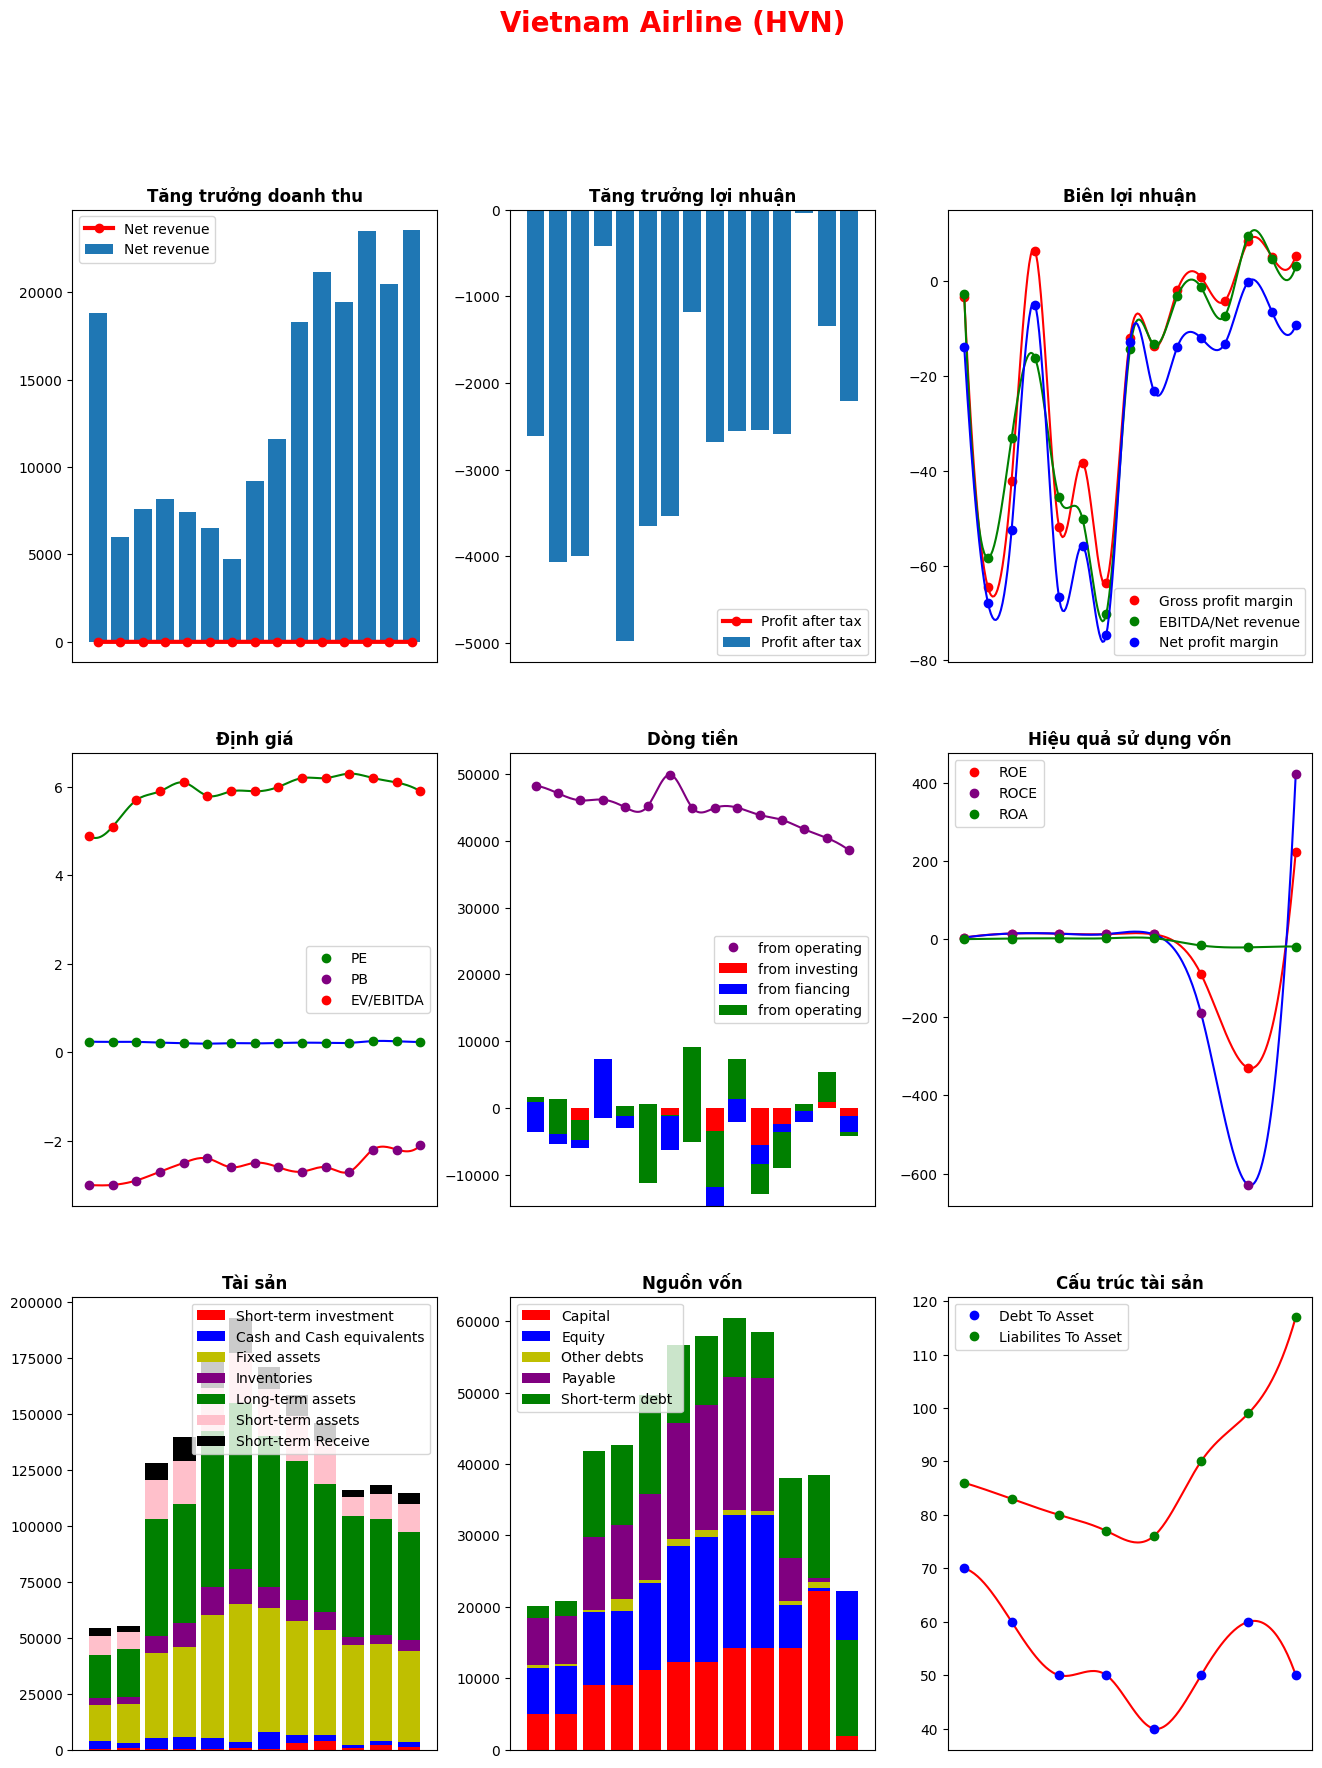

In [72]:
import numpy as np 
from scipy.interpolate import make_interp_spline, BSpline
fig = plt.gcf()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()
fig.set_size_inches(16, 20)
width = 0.4
fig.suptitle('Vietnam Airline (HVN)', fontsize=20, weight='bold', color = 'r')



'----------plot 1 --------------'
plt.subplot(3,3,1)

plt.bar(revenue.index, revenue['revenue'], label = 'Net revenue')
plt.plot(revenue_growth.index, revenue_growth['quarterRevenueGrowth'], color = 'red', label = 'Net revenue', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
# plt.ylim(-5000, 20000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng doanh thu', weight='bold')
'------------------------'
plt.subplot(3,3,2)

plt.bar(profit.index, profit['postTaxProfit'], label = 'Profit after tax')
plt.plot(profit_growth.index, profit_growth['quarterOperationProfitGrowth'], color = 'red', label = 'Profit after tax', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
# plt.ylim(-1000, 4000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng lợi nhuận',weight='bold')

'----------------------------'
plt.subplot(3,3,3)

x = np.array([i for i in range (len (profit.index))])
xnew = np.linspace(x.min(), x.max(), 200) 

spl = make_interp_spline(x, profit['gross_margin'], k=3)
y_1= spl(xnew)

plt.plot(xnew, y_1, color = 'red')
plt.plot(profit.index, profit['gross_margin'], ls = '', color = 'r', label = 'Gross profit margin', marker = 'o')
spl2 = make_interp_spline(x, profit['EBIT'], k=3)
y_2= spl2(xnew)
plt.plot(xnew, y_2, color = 'green')
plt.plot(profit.index, profit['EBIT'], ls = '', color = 'g', label = 'EBITDA/Net revenue', marker = 'o')
spl3 = make_interp_spline(x, profit['net_margin'], k=3)
y_3= spl3(xnew)
plt.plot(xnew, y_3, color = 'b')
plt.plot(profit.index, profit['net_margin'],ls = '', color = 'b', label = 'Net profit margin', marker = 'o')
plt.xticks(rotation = 40)
# plt.ylim(10, 50)
plt.legend()
plt.xticks([])
plt.title('Biên lợi nhuận',weight='bold')

# '-----------------------'
plt.subplot(3,3,4)

x = np.array([i for i in range (len (value.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, value['PE'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'blue')
plt.plot(value.index, value['PE'],ls = '', color = 'green', label = 'PE', marker = 'o')

spl = make_interp_spline(x, value['PB'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(value.index, value['PB'],ls = '',  color = 'purple', label = 'PB', marker = 'o')

spl = make_interp_spline(x, value['EV/EBITDA'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(value.index, value['EV/EBITDA'],ls = '', color = 'red', label = 'EV/EBITDA', marker = 'o')
plt.legend()
plt.title('Định giá',weight='bold')
plt.xticks([])


'-----------------------'
plt.subplot(3,3,5)
plt.bar(cash_flow.index, cash_flow['fromInvest'], color='r', label = 'from investing')
plt.bar(cash_flow.index, cash_flow['fromFinancial'], bottom=cash_flow['fromInvest'], color='b', label = 'from fiancing')
plt.bar(cash_flow.index, cash_flow['fromSale'], bottom=cash_flow['fromInvest']+cash_flow['fromFinancial'], color='g',label = 'from operating')

x = np.array([i for i in range (len (cash.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, cash[0], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'purple')
plt.plot(cash.index, cash[0], color = 'purple',ls = '', label = 'from operating', marker = 'o')
plt.xticks(rotation = 40)
plt.legend()
plt.title('Dòng tiền',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,6)
x = np.array([i for i in (roa.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roe['roe'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(roa.index, roe['roe'],ls = '', color = 'red', label = 'ROE', marker = 'o')

x = np.array([i for i in (roce.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roce['roe'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'blue')
plt.plot(roce.index, roce['roe'],ls = '', color = 'purple', label = 'ROCE', marker = 'o')

spl = make_interp_spline(x, roa['roa'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(roa.index, roa['roa'], ls = '',color = 'green', label = 'ROA', marker = 'o')
plt.legend()
# plt.ylim(15, 60)
plt.title('Hiệu quả sử dụng vốn',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,7)
plt.bar(asset.index, asset['shortInvest'], color='r', label = 'Short-term investment')
plt.bar(asset.index, asset['Cash'], bottom=asset['shortInvest'], color='b', label = 'Cash and Cash equivalents')
plt.bar(asset.index, asset['Fixed assets'], bottom=asset['Cash']+asset['shortInvest'], color='y', label = 'Fixed assets')
plt.bar(asset.index, asset['Inventories'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets'], color='purple', label = 'Inventories')
plt.bar(asset.index, asset['Long-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories'], color='green', label = 'Long-term assets')
plt.bar(asset.index, asset['Short-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets'], color='pink', label = 'Short-term assets')
plt.bar(asset.index, asset['Short-term Receive'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets']+asset['Short-term assets'], color='black', label = 'Short-term Receive')
plt.legend()
plt.xticks([])
plt.title('Tài sản',weight='bold')

'-----------------------'
plt.subplot(3,3,8)
plt.bar(cap.index, cap['capital'], color='r', label = 'Capital')
plt.bar(cap.index, cap['equity'], bottom=cap['capital'], color='b', label = 'Equity')
plt.bar(cap.index, cap['otherDebt'], bottom=cap['capital']+cap['equity'], color='y', label = 'Other debts')
plt.bar(cap.index, cap['payable'], bottom=cap['capital']+cap['equity']+cap['otherDebt'], color='purple', label = 'Payable')
plt.bar(cap.index, cap['shortDebt'], bottom=cap['capital']+cap['equity']+cap['otherDebt']+cap['payable'], color='green', label = 'Short-term debt ')
plt.legend()
plt.title('Nguồn vốn',weight='bold')
plt.xticks([])

# '-----------------------'
plt.subplot(3,3,9)

x = np.array([i for i in (to_asset.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, to_asset['debtOnAsset'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(to_asset.index, to_asset['debtOnAsset'],ls = '',  color = 'blue', label = 'Debt To Asset', marker = 'o')
spl = make_interp_spline(x, to_asset['Liabilites to assets'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(to_asset.index, to_asset['Liabilites to assets'],ls = '', color = 'green', label = 'Liabilites To Asset', marker = 'o')
plt.legend()
plt.title('Cấu trúc tài sản',weight='bold')
plt.xticks([])

fig.savefig('HVN.png', dpi=400)


In [73]:
from vnstock import *
import talib
import matplotlib.pyplot as plt

'--prep---'
df1 = financial_flow(symbol="VHM", report_type='incomestatement', report_range='quarterly').T

revenue = df1.loc['revenue'][:15]
revenue_growth = df1.loc['quarterRevenueGrowth'][:15]
revenue = revenue.to_frame().loc[::-1]
revenue_growth = revenue_growth.to_frame().loc[::-1]
profit = df1.loc['postTaxProfit']
profit_growth = df1.loc['quarterOperationProfitGrowth']
profit = profit [:15]
profit =profit.to_frame().loc[::-1]
profit_growth = profit_growth [:15]
profit_growth =profit_growth.to_frame().loc[::-1]

gross_profit = df1.loc['grossProfit'][:15]
gross_profit = gross_profit.to_frame().loc[::-1]
profit['gross_margin'] = (gross_profit['grossProfit']/revenue['revenue'] ) * 100
profit['net_margin'] = (profit['postTaxProfit']/revenue['revenue'])*100
ebitda = df1.loc['ebitda'][:15]
ebitda = ebitda.to_frame().loc[::-1]
profit['EBIT'] = (ebitda['ebitda']/revenue['revenue']) * 100

df3 = stock_evaluation (symbol='VHM', period=1, time_window='W')
value = abs(df3['PE'][:15] / 17)
value = value.to_frame()
value['PB'] = df3['PB'][:15]
value['EV/EBITDA'] = df3['industryPB'][:15]

df4 = financial_flow(symbol="VHM", report_type='balancesheet', report_range='quarterly')[:15].T
cash = df4.loc['cash'][:15] + df4.loc['fixedAsset'][:15]
cash = cash.to_frame().loc[::-1]
cash_flow = financial_flow(symbol="HPG", report_type='cashflow', report_range='quarterly')[:15]
cash_flow = cash_flow.drop(['ticker', 'investCost', 'freeCashFlow'], axis = 1).loc[::-1]

df = financial_ratio('VHM', 'yearly', is_all = True)
# df5
roe = df.loc['roe'][:5]
b = [ -2,3,6,3,4]
roce = roe + b
roce = roce.to_frame().loc[::-1][:5] * 100
roe = roe.to_frame().loc[::-1][:5]*100
roa = df.loc['roa'].to_frame()[:5].loc[::-1]*100

df5 = financial_flow(symbol="VHM", report_type='balancesheet', report_range='yearly')[:15].T

short_invest = df5.loc['shortInvest']
asset = short_invest.to_frame().loc[::-1]
asset['Cash'] = df5.loc['cash'].to_frame().loc[::-1]
asset['Fixed assets'] = df5.loc['fixedAsset'].to_frame().loc[::-1]
asset['Inventories'] = df5.loc['shortReceivable'].to_frame().loc[::-1]
asset['Long-term assets'] = df5.loc['longAsset'].to_frame().loc[::-1]
asset['Short-term assets'] = df5.loc['shortAsset'].to_frame().loc[::-1]
asset['Short-term Receive'] = df5.loc['shortReceivable'].to_frame().loc[::-1]


cap = df5.loc['capital'].to_frame().loc[::-1]
cap['equity'] = df5.loc['equity'].to_frame().loc[::-1]
cap ['otherDebt'] = df5.loc['otherDebt'].to_frame().loc[::-1]
cap ['payable'] = df5.loc['equity'].to_frame().loc[::-1]
# cap ['debt'] = df5.loc['debt'].to_frame().loc[::-1]

cap['shortDebt'] = df5.loc['shortDebt'].to_frame().loc[::-1]

'Tai san'
# df6 = financial_flow(symbol="HSG", report_type='balancesheet', report_range='yearly')[:15].T
df6 = financial_ratio('HVN', 'yearly', is_all = True)
to_asset = df6.loc['debtOnAsset'].to_frame().loc[::-1][:8] * 100
b = [86,83,80,77,76,90,99,117]
to_asset['Liabilites to assets'] = b


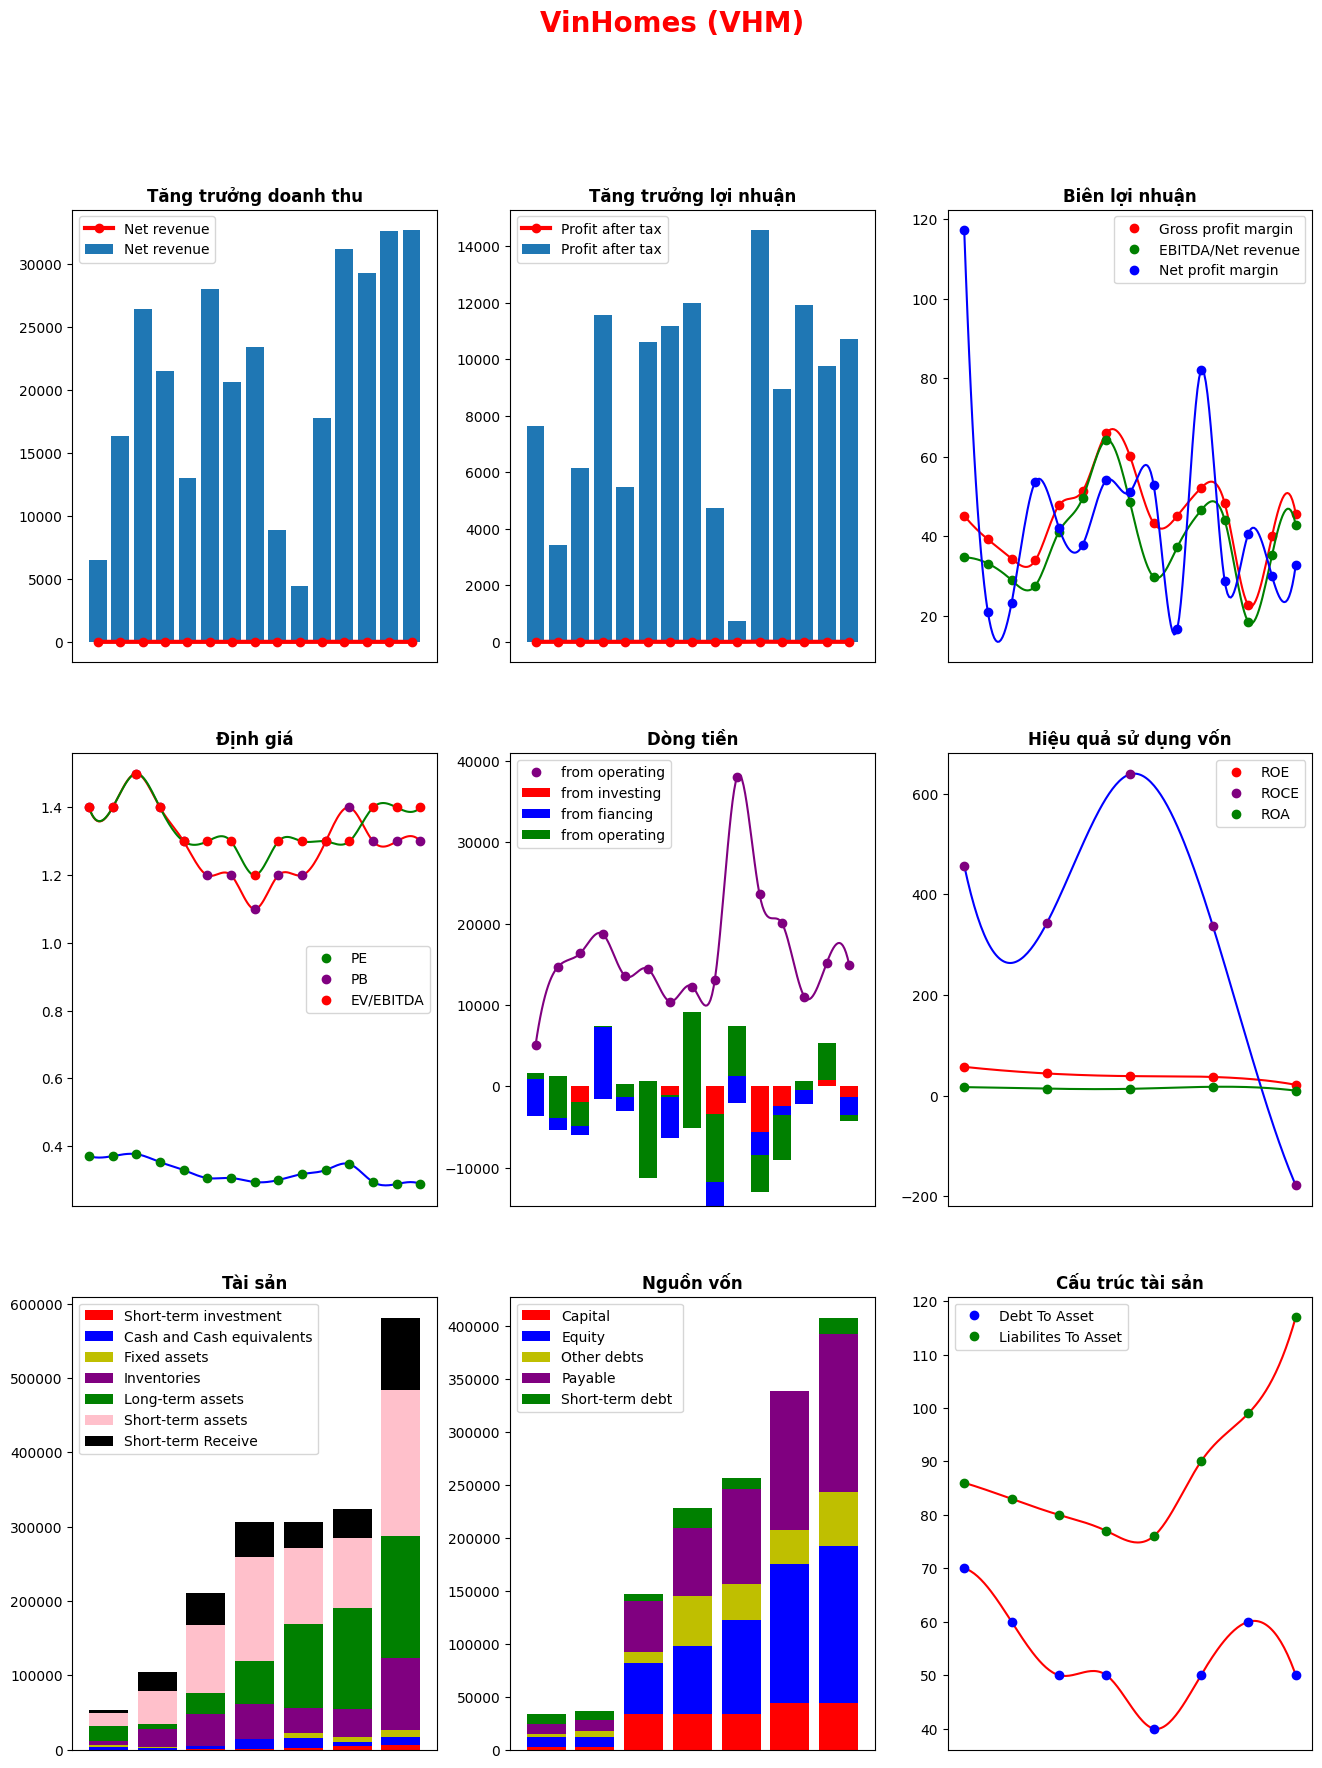

In [74]:
import numpy as np 
from scipy.interpolate import make_interp_spline, BSpline
fig = plt.gcf()
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()
fig.set_size_inches(16, 20)
width = 0.4
fig.suptitle('VinHomes (VHM)', fontsize=20, weight='bold', color = 'r')



'----------plot 1 --------------'
plt.subplot(3,3,1)

plt.bar(revenue.index, revenue['revenue'], label = 'Net revenue')
plt.plot(revenue_growth.index, revenue_growth['quarterRevenueGrowth'], color = 'red', label = 'Net revenue', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
# plt.ylim(-5000, 20000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng doanh thu', weight='bold')
'------------------------'
plt.subplot(3,3,2)

plt.bar(profit.index, profit['postTaxProfit'], label = 'Profit after tax')
plt.plot(profit_growth.index, profit_growth['quarterOperationProfitGrowth'], color = 'red', label = 'Profit after tax', marker = 'o', linewidth = 3)
plt.xticks(rotation = 40)
# plt.ylim(-1000, 4000)
plt.legend()
plt.xticks([])
plt.title('Tăng trưởng lợi nhuận',weight='bold')

'----------------------------'
plt.subplot(3,3,3)

x = np.array([i for i in range (len (profit.index))])
xnew = np.linspace(x.min(), x.max(), 200) 

spl = make_interp_spline(x, profit['gross_margin'], k=3)
y_1= spl(xnew)

plt.plot(xnew, y_1, color = 'red')
plt.plot(profit.index, profit['gross_margin'], ls = '', color = 'r', label = 'Gross profit margin', marker = 'o')
spl2 = make_interp_spline(x, profit['EBIT'], k=3)
y_2= spl2(xnew)
plt.plot(xnew, y_2, color = 'green')
plt.plot(profit.index, profit['EBIT'], ls = '', color = 'g', label = 'EBITDA/Net revenue', marker = 'o')
spl3 = make_interp_spline(x, profit['net_margin'], k=3)
y_3= spl3(xnew)
plt.plot(xnew, y_3, color = 'b')
plt.plot(profit.index, profit['net_margin'],ls = '', color = 'b', label = 'Net profit margin', marker = 'o')
plt.xticks(rotation = 40)
# plt.ylim(10, 50)
plt.legend()
plt.xticks([])
plt.title('Biên lợi nhuận',weight='bold')

# '-----------------------'
plt.subplot(3,3,4)

x = np.array([i for i in range (len (value.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, value['PE'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'blue')
plt.plot(value.index, value['PE'],ls = '', color = 'green', label = 'PE', marker = 'o')

spl = make_interp_spline(x, value['PB'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(value.index, value['PB'],ls = '',  color = 'purple', label = 'PB', marker = 'o')

spl = make_interp_spline(x, value['EV/EBITDA'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(value.index, value['EV/EBITDA'],ls = '', color = 'red', label = 'EV/EBITDA', marker = 'o')
plt.legend()
plt.title('Định giá',weight='bold')
plt.xticks([])


'-----------------------'
plt.subplot(3,3,5)
plt.bar(cash_flow.index, cash_flow['fromInvest'], color='r', label = 'from investing')
plt.bar(cash_flow.index, cash_flow['fromFinancial'], bottom=cash_flow['fromInvest'], color='b', label = 'from fiancing')
plt.bar(cash_flow.index, cash_flow['fromSale'], bottom=cash_flow['fromInvest']+cash_flow['fromFinancial'], color='g',label = 'from operating')

x = np.array([i for i in range (len (cash.index))])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, cash[0], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'purple')
plt.plot(cash.index, cash[0], color = 'purple',ls = '', label = 'from operating', marker = 'o')
plt.xticks(rotation = 40)
plt.legend()
plt.title('Dòng tiền',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,6)
x = np.array([i for i in (roa.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roe['roe'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(roa.index, roe['roe'],ls = '', color = 'red', label = 'ROE', marker = 'o')

x = np.array([i for i in (roce.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, roce['roe'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'blue')
plt.plot(roce.index, roce['roe'],ls = '', color = 'purple', label = 'ROCE', marker = 'o')

spl = make_interp_spline(x, roa['roa'], k=3)
y_3= spl(xnew)
plt.plot(xnew, y_3, color = 'green')
plt.plot(roa.index, roa['roa'], ls = '',color = 'green', label = 'ROA', marker = 'o')
plt.legend()
# plt.ylim(15, 60)
plt.title('Hiệu quả sử dụng vốn',weight='bold')
plt.xticks([])

'-----------------------'
plt.subplot(3,3,7)
plt.bar(asset.index, asset['shortInvest'], color='r', label = 'Short-term investment')
plt.bar(asset.index, asset['Cash'], bottom=asset['shortInvest'], color='b', label = 'Cash and Cash equivalents')
plt.bar(asset.index, asset['Fixed assets'], bottom=asset['Cash']+asset['shortInvest'], color='y', label = 'Fixed assets')
plt.bar(asset.index, asset['Inventories'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets'], color='purple', label = 'Inventories')
plt.bar(asset.index, asset['Long-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories'], color='green', label = 'Long-term assets')
plt.bar(asset.index, asset['Short-term assets'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets'], color='pink', label = 'Short-term assets')
plt.bar(asset.index, asset['Short-term Receive'], bottom=asset['Cash']+asset['shortInvest']+asset['Fixed assets']+asset['Inventories']+asset['Long-term assets']+asset['Short-term assets'], color='black', label = 'Short-term Receive')
plt.legend()
plt.xticks([])
plt.title('Tài sản',weight='bold')

'-----------------------'
plt.subplot(3,3,8)
plt.bar(cap.index, cap['capital'], color='r', label = 'Capital')
plt.bar(cap.index, cap['equity'], bottom=cap['capital'], color='b', label = 'Equity')
plt.bar(cap.index, cap['otherDebt'], bottom=cap['capital']+cap['equity'], color='y', label = 'Other debts')
plt.bar(cap.index, cap['payable'], bottom=cap['capital']+cap['equity']+cap['otherDebt'], color='purple', label = 'Payable')
plt.bar(cap.index, cap['shortDebt'], bottom=cap['capital']+cap['equity']+cap['otherDebt']+cap['payable'], color='green', label = 'Short-term debt ')
plt.legend()
plt.title('Nguồn vốn',weight='bold')
plt.xticks([])

# '-----------------------'
plt.subplot(3,3,9)

x = np.array([i for i in (to_asset.index)])
xnew = np.linspace(x.min(), x.max(), 200) 
spl = make_interp_spline(x, to_asset['debtOnAsset'], k=3)
y_1= spl(xnew)
plt.plot(xnew, y_1, color = 'red')
plt.plot(to_asset.index, to_asset['debtOnAsset'],ls = '',  color = 'blue', label = 'Debt To Asset', marker = 'o')
spl = make_interp_spline(x, to_asset['Liabilites to assets'], k=3)
y_2= spl(xnew)
plt.plot(xnew, y_2, color = 'red')
plt.plot(to_asset.index, to_asset['Liabilites to assets'],ls = '', color = 'green', label = 'Liabilites To Asset', marker = 'o')
plt.legend()
plt.title('Cấu trúc tài sản',weight='bold')
plt.xticks([])
fig.savefig('VHM.png', dpi=400)


# Do their stock prices have any correlation with their P/E index? Why? Clearly explain.

P/E có mối tương quan đáng kể đối với giá cổ phiếu.
Công thức của P/E là : 

P/E = Giá thị trường của cổ phiếu / Thu nhập trên một cổ phiếu

- Chỉ số P/E cao thường thể hiện sự kì vọng của nhà đầu tư về việc tăng trưởng thu nhập từ cổ phiếu sẽ cao hơn trong tương lai. Nhưng đôi khi P/E cao là biểu hiện việc doanh nghiệp kinh doanh kém hiệu quả, giá cổ phiếu được thổi phồng quá mức

- Chỉ số P/E thấp có thể do doanh nghiệp thu lợi nhuận bất thường nhưng không bền (không đến từ hoạt động kinh doanh) hoặc do cổ đông bán cổ phiếu lấy lời, khiến giá giảm. 

Tuy nhiên, chỉ số P/E thấp hay cao không phản ánh bức tranh toàn cảnh về doanh nghiệp. Ta cần so sánh P/E của doanh nghiệp đó với P/E toàn ngành cũng như tốc độ tăng trưởng lợi nhuận và thu nhập dự kiến của doanh nghiệp